In [12]:
from ggplot import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor


AttributeError: module 'pandas' has no attribute 'tslib'

In [208]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling2.csv") 
df_modeling

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Action,Category_Adventure,Category_Arcade,...,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,2.5,6.0,1,0.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5386,5.0,17.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5387,4.3,142.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5388,5.0,9.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

In [209]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [210]:
X.shape

(5390, 60)

In [211]:
y.shape

(5390,)

In [212]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

In [213]:
lr_scaler = StandardScaler()
X_train_s = lr_scaler.fit_transform(X_train)
X_test_s = lr_scaler.transform(X_test)

In [214]:
lr_model = LinearRegression() 
lr_model.fit(X_train_s, y_train)
lr_model.score(X_train_s, y_train)

0.08837689912909508

In [215]:
lr_model.score(X_test_s, y_test)

0.011986703284315503

We can see that the score are very small showing that the model does not fit the database. 

In [216]:
X_train_col = X_train.columns
X_train_col

Index(['Rating Count', 'Free', 'Price', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Category_Action', 'Category_Adventure',
       'Category_Arcade', 'Category_Art & Design', 'Category_Auto & Vehicles',
       'Category_Beauty', 'Category_Board', 'Category_Books & Reference',
       'Category_Business', 'Category_Card', 'Category_Casino',
       'Category_Casual', 'Category_Comics', 'Category_Communication',
       'Category_Dating', 'Category_Education', 'Category_Educational',
       'Category_Entertainment', 'Category_Events', 'Category_Finance',
       'Category_Food & Drink', 'Category_Health & Fitness',
       'Category_House & Home', 'Category_Libraries & Demo',
       'Category_Lifestyle', 'Category_Maps & Navigation', 'Category_Medical',
       'Category_Music', 'Category_Music & Audio', 'Category_News & Magazines',
       'Category_Parenting', 'Category_Personalization',
       'Category_Photography', 'Category_Productivity', 'Category_Puzzle',
       'Categ

In [261]:
coef_col = lr_model.coef_


In [265]:
pd.DataFrame( coef_col,X_train_col)

,0
Rating Count,3.804965e-02
Free,2.048050e-01
Price,-3.029211e-02
Ad Supported,4.705426e-02
In App Purchases,-5.679347e-02
Editors Choice,1.573813e-02
Category_Action,4.178366e+12
Category_Adventure,4.285402e+12
Category_Arcade,5.819062e+12
Category_Art & Design,3.463523e+12


In [293]:
DTR_model = DecisionTreeRegressor(random_state = 1234, max_depth = 3)
DTR_model.fit(X_train_s, y_train)
DTR_model.score(X_train_s, y_train)

0.682933723791318

In [294]:
DTR_model.score(X_test_s, y_test)

0.651416559227867

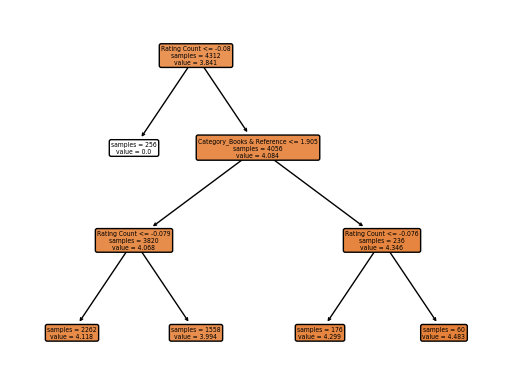

In [288]:
from sklearn.tree import plot_tree
plot_tree(DTR_model,
            feature_names = list(X.columns),
            rounded = True,
            impurity = False,
            filled = True);
            